# Лабораторная работа 3
Классификация в sklearn. Метрики классификации

Выполнил: 6132-010402D, Скиданова Анна Романовна

0.  Выберите наборы данных, подходящие для многоклассовой и бинарной классификации. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, confusion_matrix, accuracy_score, roc_curve
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


#### Первый датасет

In [176]:
# первый датасет Customer Personality Analisis
data_t = pd.read_csv("marketing_campaign.csv", sep="\t")
data_t

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [177]:
data_t.dtypes 

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

##### Пояснение для каждой колонки: 

ID: Customer's unique identifier   
Year_Birth: Customer's birth year   
Education: Customer's education level   
Marital_Status: Customer's marital status  
Income: Customer's yearly household income   
Kidhome: Number of children in customer's household   
Teenhome: Number of teenagers in customer's household    
Dt_Customer: Date of customer's enrollment with the company     
Recency: Number of days since customer's last purchase    
Complain: 1 if the customer complained in the last 2 years, 0 otherwise   

MntWines: Amount spent on wine in last 2 years   
MntFruits: Amount spent on fruits in last 2 years   
MntMeatProducts: Amount spent on meat in last 2 years   
MntFishProducts: Amount spent on fish in last 2 years    
MntSweetProducts: Amount spent on sweets in last 2 years   
MntGoldProds: Amount spent on gold in last 2 years   

NumDealsPurchases: Number of purchases made with a discount   
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise    
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise    
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise   
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise   
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise   
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise   

NumWebPurchases: Number of purchases made through the company’s website   
NumCatalogPurchases: Number of purchases made using a catalogue    
NumStorePurchases: Number of purchases made directly in stores   
NumWebVisitsMonth: Number of visits to company’s website in the last month    

#### Второй датасет

In [178]:
# второй датасет Orange vs Grapefruit
data_o_vs_g = pd.read_csv("citrus.csv", sep="\t")

###### Описание полей
name - This should be either 'orange' or 'grapefruit'.   
diameter - Diameter of the citrus fruit in centimeters.   
weight - Diameter of the citrus fruit in grams.   
red - Average red reading from an RGB scan. Values should be from 0 to 255.   
green - Average red reading from an RGB scan. Values should be from 0 to 255.   
blue - Average red reading from an RGB scan. Values should be from 0 to 255.   

In [179]:
#Нужно привести DataFrame в нормальный вид, потому что сейчас он выглядит как:
data_o_vs_g.head()

,"name,diameter,weight,red,green,blue"
0,"orange,2.96,86.76,172,85,2"
1,"orange,3.91,88.05,166,78,3"
2,"orange,4.42,95.17,156,81,2"
3,"orange,4.47,95.6,163,81,4"
4,"orange,4.48,95.76,161,72,9"


In [180]:
str1=list(data_o_vs_g)[0]
name=[] # названия колонок
while(str1.find(",")>0):
    i=0
    name.append(str1[i:str1.find(",")])
    str1=str1[str1.find(",")+1:len(str1)]
name.append(str1)

In [181]:
# DataFrame приведённый к нормальному виду
df_m = pd.DataFrame() 

for i in range(0,len(data_o_vs_g)):
    str_n=str(data_o_vs_g.iloc[i][0])
    sl={}
    k=0
    while(str_n.find(",")>0):
        i=0
        nn=str_n.find(",")
        peace_of_str=str_n[i:nn]
        if(k!=0):
            sl[name[k]]=float(peace_of_str)
        else:
            sl[name[k]]=peace_of_str
        str_n=str_n[nn+1:len(str_n)]
        k=k+1
    sl[name[k]]=float(str_n)
    df_m = df_m.append(sl, ignore_index=True)
# и теперь он выглядит
df_m.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172.0,85.0,2.0
1,orange,3.91,88.05,166.0,78.0,3.0
2,orange,4.42,95.17,156.0,81.0,2.0
3,orange,4.47,95.60,163.0,81.0,4.0
4,orange,4.48,95.76,161.0,72.0,9.0


In [182]:
df_m.dtypes 

name         object
diameter    float64
weight      float64
red         float64
green       float64
blue        float64
dtype: object

**1. Многоклассовая классификация:**

1.1 На любом датасете продемонстрировать многоклассовую классификацию с помощью ЛЮБОГО алгоритма. Оценить accuracy.

1.2. То же самое с использованием кросс-валидации

1.3. Поиграться с гиперпараметром, связанным со сложностью модели (в случае kNN — k_neighbours) и построить график accuracy для train set и test_set для разных значений гиперпараметра (в лекции есть пример построения подобного графика для kNN и датасета cancer, но можно строить как угодно такой график)

1.4. Построить confusion matrix (это вроде матрицы TN / TP/ FN/ FP, только расширенной для многоклассовой классификации, чтобы понять в какие стороны чаще ошибается классификатор). ([пример](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)):

##### 1.1 На любом датасете продемонстрировать многоклассовую классификацию с помощью ЛЮБОГО алгоритма. Оценить accuracy.


In [183]:
df=data_t.copy()

# Выделяем y для классификации и переделываем из категориального признака в числовой
y1 = df['Marital_Status'].astype('category')
y1 = y1.cat.codes

df.pop('Marital_Status')

0         Single
1         Single
2       Together
3       Together
4        Married
          ...   
2235     Married
2236    Together
2237    Divorced
2238    Together
2239     Married
Name: Marital_Status, Length: 2240, dtype: object

In [184]:
# оставшиеся категориальные признаки
df.select_dtypes(include=['object']).copy()

,Education,Dt_Customer
0,Graduation,04-09-2012
1,Graduation,08-03-2014
2,Graduation,21-08-2013
3,Graduation,10-02-2014
4,PhD,19-01-2014
...,...,...
2235,Graduation,13-06-2013
2236,PhD,10-06-2014
2237,Graduation,25-01-2014
2238,Master,24-01-2014


In [185]:
# переделываем категориальные признаки
Ed = df['Education'].astype('category')
Ed = Ed.cat.codes
df['Education']=Ed

df.pop("Dt_Customer")
df.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,2,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,4,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,3,11,0


In [186]:
#Избавляемся от значений nan
mean_m=df['Income'].mean() 
df=df.fillna(value=mean_m)
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [187]:
# разделяем на тестовые и тренировочные данные
Xtrain1, Xtest1, Ytrain1, Ytest1 = train_test_split(df, y1, test_size=0.33, random_state=0)

# обучаем
model1 = GaussianNB()
model1.fit(Xtrain1, Ytrain1)

# предсказываем для тестового набора
y_pred1 = model1.predict(Xtest1)

In [188]:
print("Accuracy: ",accuracy_score(Ytest1, y_pred1))

Accuracy:  0.22297297297297297


In [189]:
r = classification_report(Ytest1, y_pred1)
print(r)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           2       0.06      0.01      0.02        85
           3       0.40      0.50      0.44       264
           4       0.23      0.10      0.13       178
           5       0.24      0.08      0.12       189
           6       0.03      0.05      0.04        22
           7       0.00      0.00      0.00         1

    accuracy                           0.22       740
   macro avg       0.12      0.09      0.09       740
weighted avg       0.27      0.22      0.22       740



##### 1.2 используем кросс-валидацию

In [190]:
scores = cross_val_score(model1, df, y1, cv=3)
print("Mean score: ",np.mean(scores))

Mean score:  0.2964237049478821


##### 1.3. Поиграться с гиперпараметром, связанным со сложностью модели (в случае kNN — k_neighbours) и построить график accuracy для train set и test_set для разных значений гиперпараметра (в лекции есть пример построения подобного графика для kNN и датасета cancer, но можно строить как угодно такой график)

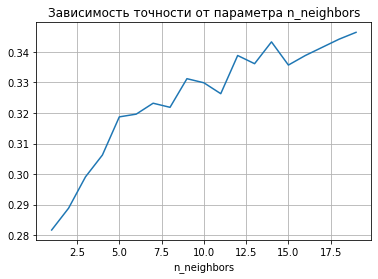

In [191]:
#Для красоты убираем предупреждение о том, что есть класс, в котором меньше 3 элементов
warnings.filterwarnings('ignore')

gr=[]
n_neighbors=range(1,20)
for i in n_neighbors:
    model2 = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(model2, df, cat, cv=3)
    gr.append(np.mean(scores))

# строим график
plt.plot(n_neighbors,gr)
plt.title("Зависимость точности от параметра n_neighbors")
plt.xlabel("n_neighbors")
plt.grid()

##### 1.4. Построить confusion matrix (это вроде матрицы TN / TP/ FN/ FP, только расширенной для многоклассовой классификации, чтобы понять в какие стороны чаще ошибается классификатор). ([пример](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)):

<AxesSubplot:>

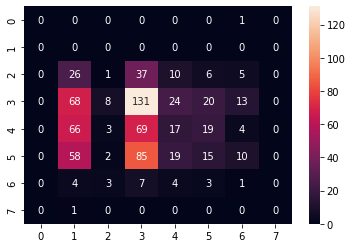

In [192]:
# строим матрицу
conf_matrix = confusion_matrix(Ytest1, y_pred1)
sns.heatmap(conf_matrix,annot=True,fmt="d")

**2. Бинарная классификация.**

На любом (но уже другом, бинарном) датасете продемонстрировать бинарную классификацию (можно использовать любой алгоритм), посчитать метрики: accuracy, precision, recall, f-measure, а также составить `classification_report`


In [193]:
#Выделяем y 
y2 = df_m['name'].astype('category')
y2 = y2.cat.codes
#Выделяем X
df_m.pop('name')

0           orange
1           orange
2           orange
3           orange
4           orange
           ...    
9995    grapefruit
9996    grapefruit
9997    grapefruit
9998    grapefruit
9999    grapefruit
Name: name, Length: 10000, dtype: object

In [194]:
# разбиваем на обучающие и тренировочные данные
Xtrain2, Xtest2, Ytrain2, Ytest2 = train_test_split(df_m, y2, test_size = 0.20)

In [195]:
# обучаем модель
model2 = SVC(kernel='linear')
model2.fit(Xtrain2, Ytrain2)

# предсказываем для тестового набора
y_pred2 = model2.predict(Xtest2)

print("Accuracy: ",accuracy_score(Ytest2, y_pred2))

Accuracy:  0.9695


In [196]:
r2 = classification_report(Ytest2, y_pred2)
print(r2)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1019
           1       0.99      0.94      0.97       981

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000




**3. Использование нормализации признаков**
В обоих задачах (бинарной и многоклассовой классификации) попробовать также вариант с предварительной нормализацией признаков (`StandardScaler`или `MinMaxScaler`). Оценить метрики качества в случае с нормализованными признаками и ненормализованными.

In [197]:
# Для первого датасета
scaler = StandardScaler()
Xtrain1 = scaler.fit_transform(Xtrain1)
Xtest1 = scaler.transform(Xtest1)

# обучаем
model1 = GaussianNB()
model1.fit(Xtrain1, Ytrain1)

# предсказываем для тестового набора
y_pred = model1.predict(Xtest1)
print("Accuracy: ",accuracy_score(Ytest1, y_pred))

Accuracy:  0.033783783783783786


In [198]:
r3 = classification_report(Ytest1, y_pred)
print(r3)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00        85
           3       1.00      0.01      0.02       264
           4       0.33      0.02      0.03       178
           5       0.25      0.01      0.01       189
           6       0.04      0.86      0.08        22
           7       0.00      0.00      0.00         1

    accuracy                           0.03       740
   macro avg       0.20      0.11      0.02       740
weighted avg       0.50      0.03      0.02       740



In [202]:
#Для второго датасета
scaler = StandardScaler()
Xtrain2 = scaler.fit_transform(Xtrain2)
Xtest2 = scaler.transform(Xtest2)

In [203]:
model4 = SVC(kernel='linear')
model4.fit(Xtrain2, Ytrain2)

# предсказываем для тестового набора
y_pred = model4.predict(Xtest2)
print("Accuracy: ",accuracy_score(Ytest2, y_pred))

Accuracy:  0.957


In [204]:
r4 = classification_report(Ytest2, y_pred)
print(r4)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1019
           1       0.97      0.94      0.96       981

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



##### выводы
По результатам видно, что при нормализации признаков для многоклассовой классификации результаты ухудшаются значительно, для бинарной - незначительно.